In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing
dataset= fetch_california_housing()

In [3]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
df=pd.DataFrame(data=dataset.data , columns=dataset.feature_names)

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [11]:
dataset.target_names

['MedHouseVal']

In [12]:
df['MedHouseVal']=dataset.target

In [13]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
X=df.iloc[: , :-1]
y=df.iloc[: ,  -1]

In [15]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y  , test_size=0.33 , random_state=42)

In [18]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

In [19]:
regressor.fit(X_train  , y_train)

DecisionTreeRegressor()

In [21]:
y_pred=regressor.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [26]:
print(mean_absolute_error(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))
print(np.sqrt(mean_squared_error(y_test , y_pred)))
print(r2_score(y_pred , y_test))

0.4778528714034058
0.549188794848444
0.7410727324955655
0.5940811406636324


In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameters={
    'criterion' : ['squared_error' , 'friedman_mse' , 'absolute_error', 'poisson'] , 
    'splitter' : ['best' , 'random'] , 
    'max_depth' : (1,2,3,4,5),
    'max_features' : ['auto' , 'sqrt' , 'log2']
}

In [39]:
regressor=DecisionTreeRegressor()
clf=GridSearchCV(regressor , param_grid=parameters , cv=2  , scoring='neg_mean_squared_error')

In [40]:
clf

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': (1, 2, 3, 4, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
clf.fit(X_train ,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': (1, 2, 3, 4, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [43]:
clf.best_params_

{'criterion': 'poisson',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [44]:
clf.best_score_

-0.5230120926565449

In [47]:
regressor=DecisionTreeRegressor(criterion='poisson' , max_depth= 5 , max_features='auto' , splitter='best')

In [49]:
regressor.fit(X_train , y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5, max_features='auto')

In [50]:
y_pred=regressor.predict(X_test)

In [51]:
print(mean_absolute_error(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))
print(np.sqrt(mean_squared_error(y_test , y_pred)))
print(r2_score(y_pred , y_test))

0.5189373340315168
0.5074486299105527
0.7123542867917289
0.4064464362231418


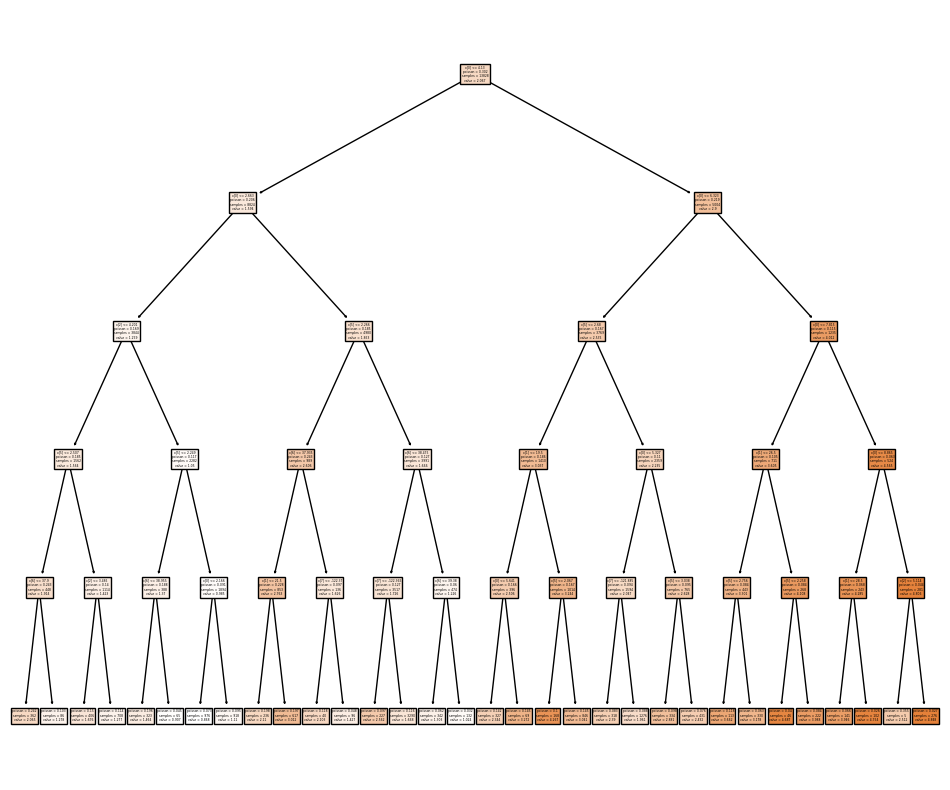

In [53]:
from sklearn import tree
plt.figure(figsize=(12 , 10))
tree.plot_tree(regressor , filled=True)
plt.show()